In [2]:
import keras
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image


In [13]:
model = keras.models.load_model('mnist_model.keras')

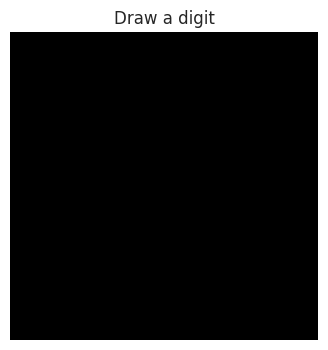

In [16]:
canvas_size = 280
img = np.ones((canvas_size, canvas_size), dtype=np.float32)
fig, ax = plt.subplots(figsize=(4,4))
ax.imshow(img, cmap='gray')
ax.set_title('Draw a digit')
ax.axis('off')
coords = []

def on_move(event):
    if event.inaxes == ax and event.button == 1:
        x, y = int(event.xdata), int(event.ydata)
        img[max(0, y-8):min(canvas_size, y+8), max(0, x-8):min(canvas_size, x+8)] = 0
        ax.imshow(img, cmap='gray')
        fig.canvas.draw_idle()

def on_release(event):
    pass

fig.canvas.mpl_connect('motion_notify_event', on_move)
fig.canvas.mpl_connect('button_release_event', on_release)
plt.show()


In [17]:
img_small = Image.fromarray((img*255).astype(np.uint8)).resize((28,28), Image.LANCZOS)
img_arr = np.array(img_small).astype('float32') / 255.0
img_arr = 1.0 - img_arr
img_arr = img_arr.reshape(1, 28*28)
pred = model.predict(img_arr)
pred_digit = np.argmax(pred)
print(f'Predicted digit: {pred_digit}')


NameError: name 'Image' is not defined